In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [77]:
print("For simplication, consider two columns Age and Annual Income")
data=df[["Age","Annual Income (k$)"]]
data.head()

For simplication, consider two columns Age and Annual Income


,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [78]:
data.isna().sum()

Age                   0
Annual Income (k$)    0
dtype: int64

In [79]:
data.shape

(200, 2)

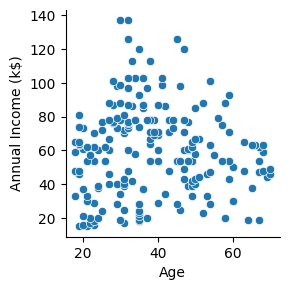

In [80]:
sns.relplot(data=data, x="Age", y="Annual Income (k$)", height=3)

# DBSCAN

In [81]:
from sklearn.cluster import DBSCAN

In [82]:
db=DBSCAN(eps=5,min_samples=4)
db.fit(data)

DBSCAN(eps=5, min_samples=4)

In [83]:
print("Note that we can find the number of clusters by counting the unique elements of labels excluding -1.")
n_clusters=len(set(db.labels_))-(1 if -1 in db.labels_ else 0)
n_clusters

Note that we can find the number of clusters by counting the unique elements of labels excluding -1.


10

# Different attributes

In [84]:
print("This provides cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.")
label=db.labels_
label

This provides cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.


array([ 0,  0,  0,  0,  1,  0,  1,  0, -1,  1, -1,  1, -1,  0,  1,  0,  1,
        0, -1,  1,  1,  0, -1,  1, -1,  1, -1,  1, -1,  2, -1,  2, -1,  2,
       -1,  2, -1, -1, -1,  2, -1,  2,  3,  2,  3,  2,  3,  2,  2,  2,  3,
        2,  2, -1,  3,  3,  3,  4,  2,  3,  4, -1,  4,  3,  4, -1, -1,  4,
       -1, -1,  4, -1,  4,  4,  4,  5,  6,  6,  5,  6,  4, -1, -1,  6,  5,
        6,  4,  5, -1,  6,  7,  5,  6, -1,  5,  5,  6,  5,  6,  5,  5,  6,
        7,  5,  6,  5,  7,  6,  7,  7,  7,  5,  6,  5,  5,  5,  7,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6, -1,  6,  6,  6,  6,  6,  6,  6,
        6,  6, -1,  6, -1,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6, -1,  6, -1,  6, -1,  8,  8,  8,  8,  8,
        8,  8,  8,  8, -1,  8, -1,  8, -1,  9,  9,  9, -1,  9,  9,  9, -1,
        9,  9,  9,  9,  9, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [85]:
print("This provides copy of each core sample found by training.")
db.components_

This provides copy of each core sample found by training.


array([[ 19,  15],
       [ 21,  15],
       [ 20,  16],
       [ 23,  16],
       [ 31,  17],
       [ 22,  17],
       [ 35,  18],
       [ 23,  18],
       [ 35,  19],
       [ 24,  20],
       [ 37,  20],
       [ 22,  20],
       [ 35,  21],
       [ 20,  21],
       [ 35,  23],
       [ 35,  24],
       [ 31,  25],
       [ 35,  28],
       [ 21,  30],
       [ 18,  33],
       [ 21,  33],
       [ 20,  37],
       [ 24,  38],
       [ 48,  39],
       [ 31,  39],
       [ 49,  39],
       [ 24,  39],
       [ 50,  40],
       [ 27,  40],
       [ 29,  40],
       [ 31,  40],
       [ 49,  42],
       [ 33,  42],
       [ 31,  43],
       [ 50,  43],
       [ 47,  43],
       [ 51,  44],
       [ 69,  44],
       [ 53,  46],
       [ 70,  46],
       [ 67,  47],
       [ 63,  48],
       [ 68,  48],
       [ 70,  49],
       [ 60,  50],
       [ 60,  50],
       [ 59,  54],
       [ 26,  54],
       [ 45,  54],
       [ 23,  54],
       [ 49,  54],
       [ 57,  54],
       [ 46,

In [86]:
print("This provides indices of core samples.")
db.core_sample_indices_

This provides indices of core samples.


array([  0,   1,   2,   3,   4,   5,   6,   7,  11,  13,  14,  15,  16,
        17,  19,  20,  23,  27,  31,  33,  35,  39,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  54,  55,  56,  57,  59,
        60,  62,  64,  67,  70,  72,  73,  74,  75,  76,  78,  79,  80,
        83,  84,  85,  87,  89,  90,  91,  92,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 113, 114,
       115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 129,
       130, 131, 132, 133, 135, 136, 137, 139, 141, 142, 143, 144, 145,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       161, 163, 165, 167, 168, 169, 170, 171, 172, 173, 175, 180, 181,
       183, 185, 187, 189, 191], dtype=int64)